# Parse the spreadsheet information

In [15]:
from pandas import read_excel

clade_mapping = read_excel("MAGs_toKBase_formodels.xlsx")
genera_to_track = ["Planktophila", "Methylopumilus", "Polynucleobacter", "Pirellula_B", "UBA3064", "UBA954"]


In [16]:
Planktophila, Methylopumilus, Polynucleobacter, Pirellula_B, UBA3064, UBA954 = [], [], [], [], [], [] 
other = []

for index, row in clade_mapping.iterrows():
    if not isinstance(row["classification"], str):  continue
    if "Planktophila" in row["classification"]:  Planktophila.append(row["user_genome"])
    elif "Methylopumilus" in row["classification"]:  Methylopumilus.append(row["user_genome"])
    elif "Polynucleobacter" in row["classification"]:  Polynucleobacter.append(row["user_genome"])
    elif "Pirellula_B" in row["classification"]:  Pirellula_B.append(row["user_genome"])
    elif "UBA3064" in row["classification"]:  UBA3064.append(row["user_genome"])
    elif "UBA954" in row["classification"]:  UBA954.append(row["user_genome"])
    else:  other.append(row["user_genome"])

In [2]:
clade_mapping

,user_genome,classification,dRep winner,Model
0,NASQAN2010_127_F_bin.3,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Y,Y
1,NASQAN2010_155_B_bin.36,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Y,Y
2,NASQAN2011_265_F_bin.15,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Y,Y
3,NASQAN2011_330_F_bin.10,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Y,Y
4,NASQAN2012_130_B_bin.14,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Y,Y
...,...,...,...,...
3822,NASQAN2012_115_A_bin.3,d__Bacteria;p__Acidobacteriota;c__Holophagae;o...,N,N
3823,tombigeeriver_2019_sw_WHONDRS-S19S_0020_B_bin.104,d__Bacteria;p__Acidobacteriota;c__Holophagae;o...,N,N
3824,NASQAN2011_262_A_bin.12,d__Bacteria;p__Acidobacteriota;c__Blastocatell...,N,N
3825,NaN,NaN,NaN,N


In [4]:
taxa = [taxon.split(";") for taxon in clade_mapping["classification"] if isinstance(taxon, str)]
for domain, phylum, Class, order, family, genus, species in taxa:
    if 

['d__Bacteria',
 'p__Proteobacteria',
 'c__Gammaproteobacteria',
 'o__Burkholderiales',
 'f__Methylophilaceae',
 'g__Methylopumilus',
 's__Methylopumilus universalis']

In [3]:
print(len(other))
print(list(map(len, [Planktophila, Methylopumilus, Polynucleobacter, Pirellula_B, UBA3064, UBA954])))

3406
[122, 81, 127, 6, 47, 36]


In [ ]:
print("Planktophila =", Planktophila, "\n")
print("Methylopumilus =", Methylopumilus, "\n")
print("Polynucleobacter =", Polynucleobacter, "\n")
print("Pirellula_B =", Pirellula_B, "\n")
print("UBA3064 =", UBA3064, "\n")
print("UBA954 =", UBA954, "\n")

# loading models

In [28]:
import os
os.environ["HOME"] = "/Users/afreiburger/Documents/cobrakbase/" # os.path.join('C:', 'Users', 'Andrew Freiburger','Documents','Argonne','cobrakbase')
import cobrakbase
with open("D:/Users/Andrew Freiburger/Documents/Argonne/kbase_token.txt") as token_file:
# with open("/Users/afreiburger/Documents/kbase_token.txt") as token_file:
    kbase_api = cobrakbase.KBaseAPI(token_file.readline())

In [29]:
models = kbase_api.list_objects(165689, object_type="KBaseFBA.FBAModel", include_metadata=False)
print(len(models))

3538


In [30]:
all_organisms = [ele for ls in [Planktophila, Methylopumilus, Polynucleobacter, Pirellula_B, UBA3064, UBA954] for ele in ls]

In [32]:
from json import dump

name_to_id = {obj[1].replace(".RAST.mdl", ""): f"165689/{obj[0]}/{obj[4]}" for obj in models}
with open("model_names_to_IDs.json", 'w') as jsonOut:
    dump(name_to_id, jsonOut, indent=3)

In [8]:
Planktophila = {k:v for k,v in name_to_id.items() if k in Planktophila}
Methylopumilus = {k:v for k,v in name_to_id.items() if k in Methylopumilus}
Polynucleobacter = {k:v for k,v in name_to_id.items() if k in Polynucleobacter}
Pirellula_B = {k:v for k,v in name_to_id.items() if k in Pirellula_B}
UBA3064 = {k:v for k,v in name_to_id.items() if k in UBA3064}
UBA954 = {k:v for k,v in name_to_id.items() if k in UBA954}

In [11]:
constructed_models = []
for model in models:
    genome_name = model[1].replace(".RAST.mdl", "")
    if genome_name in all_organisms:
        constructed_models.append(genome_name)

missing_models = set(all_organisms)-set(constructed_models)
print("missing models", len(missing_models), missing_models)

missing models 4 {'umpqua_2019_sw_WHONDRS-S19S_0079_B_bin.26', 'altamaha_2019_sw_WHONDRS-S19S_0010_B_bin.152', 'columbia_2019_sw_WHONDRS-S19S_0036_B_bin.61', 'NASQAN2016_024_A_bin.8'}


In [10]:
print([all([organism in constructed_models for organism in ls]) for ls in [Planktophila, Methylopumilus, Polynucleobacter, Pirellula_B, UBA3064, UBA954]])

[True, True, True, True, True, True]


In [17]:
clades_models = {"Planktophila": Planktophila, "Methylopumilus": Methylopumilus, "Polynucleobacter": Polynucleobacter, 
                 "Pirellula_B": Pirellula_B, "UBA3064": UBA3064, "UBA954": UBA954}

In [27]:
print(clades_models)

{'Planktophila': ['NASQAN2014_188_F_bin.12', 'NASQAN2016_164_F_bin.24', 'NASQAN2011_330_B_bin.17', 'NASQAN2014_193_B_bin.9', 'NASQAN2014_193_B_bin.83', 'NASQAN2015_208_B_bin.25', 'yakimariver_2019_sw_WHONDRS-S19S_0060_A_bin.25', 'NASQAN2014_190_A_bin.31', 'NASQAN2015_172_B_bin.57', 'NASQAN2015_174_B_bin.17', 'NASQAN2015_227_F_bin.3', 'pamunkeyriver_2019_sw_WHONDRS-S19S_0054_F_bin.9', 'NASQAN2011_057_B_bin.7', 'NASQAN2011_250_B_bin.9', 'NASQAN2011_250_F_bin.9', 'NASQAN2011_256_B_bin.24', 'NASQAN2011_265_F_bin.3', 'NASQAN2011_286_B_bin.20', 'NASQAN2011_286_F_bin.2', 'NASQAN2014_144_F_bin.23', 'NASQAN2014_188_A_bin.31', 'NASQAN2014_193_B_bin.55', 'NASQAN2015_047_F_bin.5', 'NASQAN2015_047_F_bin.9', 'NASQAN2015_052_B_bin.57', 'NASQAN2015_052_F_bin.15', 'NASQAN2015_052_F_bin.18', 'NASQAN2015_111_B_bin.69', 'NASQAN2015_150_F_bin.7', 'NASQAN2015_172_F_bin.7', 'NASQAN2015_174_F_bin.13', 'NASQAN2015_208_B_bin.21', 'NASQAN2015_208_F_bin.14', 'NASQAN2016_024_B_bin.5', 'NASQAN2016_164_A_bin.16', 'a

# Construct the clade models

In [12]:
%run ../../ModelSEEDpy/modelseedpy/core/msprobability.py

clade_model = MSProbability.megaModel({"Pirellula_B": list(Pirellula_B.values())}, kbase_api) #, "Pirellula_B.json")

165689/6616/2	index 3												
 Pirellula_B
missing reactions:  {'numMembers'}


In [150]:
from cobra.io import to_json
from json import dump

model_json = to_json(clade_model[0])
with open("test_json.json", "w") as jsonOut:   dump(model_json, jsonOut, indent = 3)

test_json_model = load_json_model("test_json.json")

TypeError: string indices must be integers

In [13]:
from cobra.io import read_sbml_model
sample_model = read_sbml_model("reaction_counts/Pirellula_B.xml")

In [145]:
for rxn in sample_model.reactions:
    rxn.probability = 0.5
    # print(rxn.probability)

print(dir(sample_model.reactions[0]))

from cobra.io import save_json_model
save_json_model(sample_model, "probability_attribute_test.json")

['__add__', '__class__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__isub__', '__le__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__weakref__', '_annotation', '_associate_gene', '_check_bounds', '_dissociate_gene', '_genes', '_gpr', '_id', '_lower_bound', '_metabolites', '_model', '_repr_html_', '_set_id_with_model', '_update_awareness', '_upper_bound', 'add_metabolites', 'annotation', 'boundary', 'bounds', 'build_reaction_from_string', 'build_reaction_string', 'check_mass_balance', 'compartments', 'copy', 'delete', 'flux', 'flux_expression', 'forward_variable', 'functional', 'gene_name_reaction_rule', 'gene_reaction_rule', 'genes', 'get_coefficient'

In [146]:
from cobra.io import load_json_model
probability_attribute_test = load_json_model("probability_attribute_test.json")
print(dir(probability_attribute_test.reactions[0]))

['__add__', '__class__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__isub__', '__le__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__weakref__', '_annotation', '_associate_gene', '_check_bounds', '_dissociate_gene', '_genes', '_gpr', '_id', '_lower_bound', '_metabolites', '_model', '_repr_html_', '_set_id_with_model', '_update_awareness', '_upper_bound', 'add_metabolites', 'annotation', 'boundary', 'bounds', 'build_reaction_from_string', 'build_reaction_string', 'check_mass_balance', 'compartments', 'copy', 'delete', 'flux', 'flux_expression', 'forward_variable', 'functional', 'gene_name_reaction_rule', 'gene_reaction_rule', 'genes', 'get_coefficient'

In [ ]:
# from cobra.io import read_sbml_model
from cobrakbase.core.kbasefba.fbamodel_from_cobra import CobraModelConverter
cobra_prob_test = CobraModelConverter(sample_model).build()
print(cobra_prob_test.slim_optimize())

In [142]:
%run ../../ModelSEEDpy/modelseedpy/core/msprobability.py


MSProbability.apply_threshold(sample_model, 0.5)

AttributeError: 'Reaction' object has no attribute 'probability'

# Counting reactions within each clade

In [33]:
def rxnFreq(args):
    from cobra.io import read_sbml_model
    from json import dump
    clade_name, kbase_api, modelIDs = args
    reaction_counts = {}
    for modelID in modelIDs:
        # try:
        #     if not path.exists(f"reaction_counts_per_asv/{asv}.json") or path.getmtime(f"reaction_counts_per_asv/{asv}.json") < 1704337200:
        model = kbase_api.get_from_ws(modelID)
        for rxn in model.reactions:
            if rxn.id in reaction_counts:   reaction_counts[rxn.id] += 1
            else:   reaction_counts[rxn.id] = 1
                # print(model.id)
        #     else:   return
        # except Exception as e:  pass
            # print("broken", e, gcf, modelID)
            # broken_model_gcfs.append(gcf)
    if reaction_counts == {}:  return
    reaction_counts = {rxnID:(count/len(modelIDs)) for rxnID,count in reaction_counts.items()}
    reaction_counts["numMembers"] = len(modelIDs)
    with open(f"reaction_counts/{clade_name}.json", "w") as jsonOut:   dump(reaction_counts, jsonOut, indent=3)


# from numpy import load
# broken_models = set(load("broken_models.npy"))
# print(broken_models)

from multiprocess import Pool
pool = Pool(24)
args = [(clade_name, kbase_api, [name_to_id[name] for name in model_names]) for clade_name, model_names in clades_models.items()]
print(args[0])
pool.map(rxnFreq, args)

('Planktophila', <cobrakbase.kbaseapi.KBaseAPI object at 0x000002040D7C1D00>, ['165689/774/1', '165689/5717/2', '165689/1479/1', '165689/3293/1', '165689/4832/2', '165689/5739/2', '165689/3152/1', '165689/4598/2', '165689/6846/4', '165689/7443/4', '165689/719/1', '165689/282/1', '165689/5732/2', '165689/977/1', '165689/1485/1', '165689/7152/4', '165689/1709/1', '165689/1083/1', '165689/100/1', '165689/1762/1', '165689/1212/1', '165689/1302/1', '165689/2660/1', '165689/4776/2', '165689/3183/1', '165689/2547/1', '165689/6842/4', '165689/559/1', '165689/1665/1', '165689/7131/4', '165689/5061/2', '165689/1771/1', '165689/4269/1', '165689/3339/1', '165689/3312/1', '165689/4372/2', '165689/6416/2', '165689/7115/4', '165689/4728/2', '165689/4506/2', '165689/5461/2', '165689/4524/2', '165689/1071/1', '165689/7029/4', '165689/5075/2', '165689/1848/1', '165689/7620/4', '165689/2042/1', '165689/2107/1', '165689/698/1', '165689/1767/1', '165689/502/1', '165689/6257/2', '165689/7272/4', '165689/743

[None, None, None, None, None, None]

In [20]:
from json import dump

with open("clade_models.json", 'w') as jsonOut:
    dump(clades_models, jsonOut, indent=3)

# building the clade models

In [5]:
import os
# os.environ["HOME"] = "/Users/afreiburger/Documents/cobrakbase/"
os.environ["HOME"] = os.path.join('C:', 'Users', 'Andrew Freiburger','Documents','Argonne','cobrakbase')
import cobrakbase
# with open("D:/Users/Andrew Freiburger/Documents/Argonne/kbase_token.txt") as token_file:
with open("/Users/afreiburger/.kbase/token") as token_file:
    kbase_api = cobrakbase.KBaseAPI(token_file.readline())

In [6]:
# %run ../../ModelSEED/ModelSEEDpy/modelseedpy/core/msprobability.py
%run ../../ModelSEEDpy/modelseedpy/core/msprobability.py

from json import load
with open("clade_models.json", 'r') as jsonIn:
    clades_models = load(jsonIn)
with open("model_names_to_IDs.json", 'r') as jsonIn:
    name_to_id = load(jsonIn)

mapped_clades_models = {clade_name: [name_to_id[model] for model in models] for clade_name, models in clades_models.items()}
megaModels = MSProbability.megaModel(mapped_clades_models, kbase_api, "reaction_counts", "numMembers")


 Planktophila


KeyboardInterrupt: 

In [18]:
for model in megaModels:
    for rxn in model.reactions:
        if "probability" not in rxn.notes:
            print(model.id, rxn.id)

In [71]:
%run ../../ModelSEEDpy/modelseedpy/core/msprobability.py

from cobra.io import read_sbml_model
from glob import glob

megaModels = [read_sbml_model(model) for model in glob("reaction_counts/*.xml")]
prFBA_sol = MSProbability.prFBA(megaModels, printLP=True)

The ID rxn02201_c0 is changed with 1 to create the final ID rxn02201_c1
The ID rxn07431_c0 is changed with 1 to create the final ID rxn07431_c1
The ID rxn00836_c0 is changed with 1 to create the final ID rxn00836_c1
The ID rxn05318_c0 is changed with 1 to create the final ID rxn05318_c1
The ID rxn00423_c0 is changed with 1 to create the final ID rxn00423_c1
The ID rxn00364_c0 is changed with 1 to create the final ID rxn00364_c1
The ID rxn05250_c0 is changed with 1 to create the final ID rxn05250_c1
The ID rxn05440_c0 is changed with 1 to create the final ID rxn05440_c1
The ID rxn01673_c0 is changed with 1 to create the final ID rxn01673_c1
The ID rxn02360_c0 is changed with 1 to create the final ID rxn02360_c1
The ID rxn02342_c0 is changed with 1 to create the final ID rxn02342_c1
The ID rxn00642_c0 is changed with 1 to create the final ID rxn00642_c1
The ID rxn00022_c0 is changed with 1 to create the final ID rxn00022_c1
The ID rxn02632_c0 is changed with 1 to create the final ID rxn0

In [72]:
display(prFBA_sol)

from json import dump

fluxes_dic = prFBA_sol.fluxes.to_dict()
with open("clade_fluxes.json", "w") as jsonOut:
    dump(fluxes_dic, jsonOut, indent=3)
print(fluxes_dic)

,fluxes,reduced_costs
rxn01987_c6,0.000000,2.131148e-01
rxn03174_c6,0.000000,2.295082e-01
rxn00558_c6,0.000000,9.016393e-02
rxn00011_c6,-0.314452,2.459016e-02
rxn03264_c6,0.000000,-1.147541e-01
...,...,...
rxn16341_c5,0.000000,-2.500000e-01
rxn00931_c1,0.000000,-1.000000e-02
rxn16237_c5,0.000000,6.900768e+01
bio1,2.674369,-4.263256e-14


{'rxn01987_c6': 0.0, 'rxn03174_c6': 0.0, 'rxn00558_c6': 0.0, 'rxn00011_c6': -0.3144515271953265, 'rxn03264_c6': 0.0, 'rxn02200_c6': 0.0, 'rxn10481_c6': 0.0007131831220243278, 'rxn03243_c6': 0.0, 'rxn00692_c6': -0.12063218554467263, 'rxn01492_c6': 0.0, 'rxn00691_c6': 0.0, 'rxn00802_c6': 0.0, 'rxn02160_c6': 0.0, 'rxn02720_c6': 0.0, 'rxn01302_c6': 0.0, 'rxn00913_c6': 0.0, 'rxn02285_c6': -0.014298643170927453, 'rxn00460_c6': 0.0, 'rxn03087_c6': 0.0, 'rxn00171_c6': 3.2909972675589203, 'rxn03047_c6': 0.0, 'rxn03958_c6': -0.17440146980878576, 'rxn00559_c6': 0.07447502913481556, 'rxn00506_c6': 0.0, 'rxn00459_c6': -0.24378843476165343, 'rxn00178_c6': -4.159232976774231, 'rxn05294_c6': 0.005423040360423242, 'rxn02834_c6': 0.0, 'rxn05161_c6': 0.0, 'EX_cpd01171_e0': 0.0, 'rxn05493_c3': 0.0, 'EX_cpd00731_e0': 0.0, 'rxn02507_c2': 0.0, 'rxn00430_c3': 0.0, 'EX_cpd00028_e0': -0.004279098732145966, 'rxn00269_c2': 0.0, 'rxn05357_c2': 0.0, 'EX_cpd00156_e0': -0.15153176396111429, 'rxn00451_c2': -0.00427909

In [75]:
print(prFBA_sol.fluxes.to_dict())

{'rxn01987_c6': 0.0, 'rxn03174_c6': 0.0, 'rxn00558_c6': 0.0, 'rxn00011_c6': -0.3144515271953265, 'rxn03264_c6': 0.0, 'rxn02200_c6': 0.0, 'rxn10481_c6': 0.0007131831220243278, 'rxn03243_c6': 0.0, 'rxn00692_c6': -0.12063218554467263, 'rxn01492_c6': 0.0, 'rxn00691_c6': 0.0, 'rxn00802_c6': 0.0, 'rxn02160_c6': 0.0, 'rxn02720_c6': 0.0, 'rxn01302_c6': 0.0, 'rxn00913_c6': 0.0, 'rxn02285_c6': -0.014298643170927453, 'rxn00460_c6': 0.0, 'rxn03087_c6': 0.0, 'rxn00171_c6': 3.2909972675589203, 'rxn03047_c6': 0.0, 'rxn03958_c6': -0.17440146980878576, 'rxn00559_c6': 0.07447502913481556, 'rxn00506_c6': 0.0, 'rxn00459_c6': -0.24378843476165343, 'rxn00178_c6': -4.159232976774231, 'rxn05294_c6': 0.005423040360423242, 'rxn02834_c6': 0.0, 'rxn05161_c6': 0.0, 'EX_cpd01171_e0': 0.0, 'rxn05493_c3': 0.0, 'EX_cpd00731_e0': 0.0, 'rxn02507_c2': 0.0, 'rxn00430_c3': 0.0, 'EX_cpd00028_e0': -0.004279098732145966, 'rxn00269_c2': 0.0, 'rxn05357_c2': 0.0, 'EX_cpd00156_e0': -0.15153176396111429, 'rxn00451_c2': -0.00427909

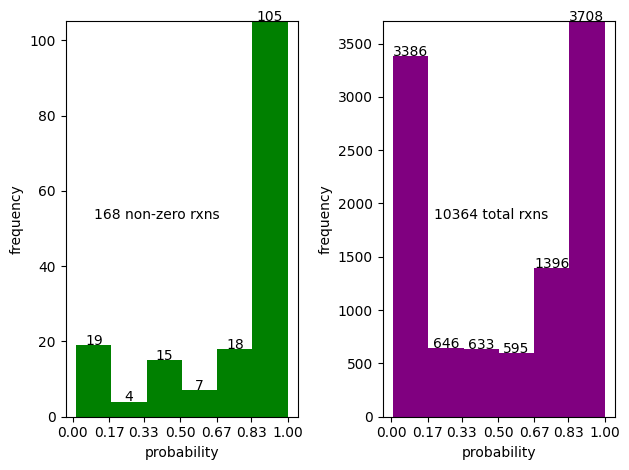

In [116]:
nonZeroFlux = {ID: flux for ID, flux in fluxes_dic.items() if flux != 0}

# Maybe make a histogram of the number of reactions with each probability that have a nonzero flux in your output solution.
# In the same plot, show the number of reactions in the model with each probability…
# To number of reactions on y axis… probability on the x axis.

from matplotlib.ticker import FormatStrFormatter
from matplotlib import pyplot
fig, axs = pyplot.subplots(1, 2, tight_layout=True)
from re import sub
model_rxns = {model: [rxn.id for rxn in model.reactions] for model in megaModels}
rxnProbabilities = [round(float(model.reactions.get_by_id(sub("(\_c\d)", "_c0", rxnID)).notes["probability"]), 3)
                    for rxnID in nonZeroFlux for model, modelRxnIDs in model_rxns.items() if rxnID in modelRxnIDs]
counts1, bins1, patches1 = axs[0].hist(rxnProbabilities, bins=len(megaModels), color="green")
counts2, bins2, patches2 = axs[1].hist([round(float(rxn.notes["probability"]), 3) for model in megaModels for rxn in model.reactions],
                                        bins=len(megaModels), color="purple")

# Label each bar
for count1, bin1, patch1 in zip(counts1, bins1, patches1):
    # Center the text horizontally on the patch (bar)
    x = bin1 + patch1.get_width() / 2
    # Position the text slightly above the top of the bar
    y = patch1.get_height() + 0.1
    # Use the count as the label
    axs[0].text(x, y, str(int(count1)), ha='center')

for count2, bin2, patch2 in zip(counts2, bins2, patches2):
    # Center the text horizontally on the patch (bar)
    x = bin2 + patch2.get_width() / 2
    # Position the text slightly above the top of the bar
    y = patch2.get_height() + 0.1
    # Use the count as the label
    axs[1].text(x, y, str(int(count2)), ha='center')

# print(max(counts1), len(rxnProbabilities), max(counts2))
# axs[0].set_xlim([0, 1])  ;  axs[1].set_xlim([0, 1])
from numpy import linspace
x_axis_range = [round(x,2) for x in linspace(0, 1, num=len(megaModels)+1)]
axs[0].set_xticks(x_axis_range)  ;  axs[1].set_xticks(x_axis_range)

axs[0].set_ylim([0, max(counts1)]) ;  axs[1].set_ylim([0, max(counts2)])
axs[0].text(.1, max(counts1)/2, f"{len(rxnProbabilities)} non-zero rxns")
axs[1].text(.2, max(counts2)/2, f"{sum(map(len, model_rxns.values()))} total rxns")
axs[0].set_xlabel("probability") ; axs[1].set_xlabel("probability")
axs[0].set_ylabel("frequency")   ; axs[1].set_ylabel("frequency")
# pyplot.show()
fig.savefig("probabilities_histogram.jpg")

# locs, labels = pyplot.xticks()
# print(locs, labels)
# rounded_labels = [round(loc, 3) for loc in locs]
# pyplot.xticks(locs, rounded_labels)
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))



# from matplotlib import pyplot
# pyplot.bar(nonZeroFlux.keys(), nonZeroFlux.values())
# pyplot.xticks(rotation=90)
# pyplot.show()
